# Homework 4
# OCNG 489
## Author: Trent Spencer
### Python 3.5.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

Enter file location: ../python4geosciences/data/merrimack_discharge.dat


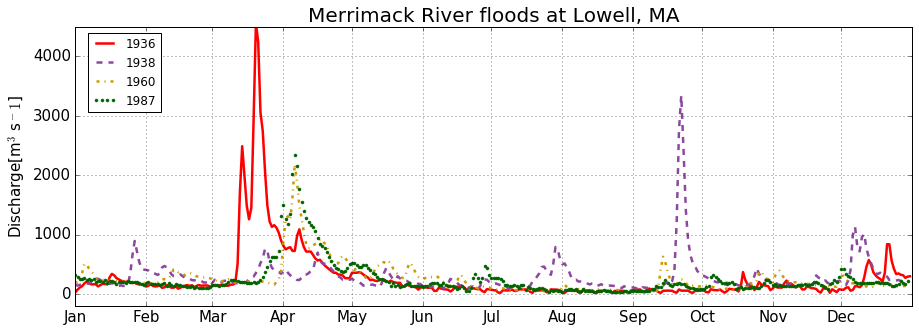

In [3]:
# Question 1
def riverplot():
    '''Reads in and plots the river data for selected years'''
    filename = input("Enter file location: ")
    file = open(filename)
    data1936 = []
    data1938 = []
    data1960 = []
    data1987 = []
    for line in file.readlines():
        if line[0] == '#': continue
        data = line.split()
        if data[0] == 'USGS':
            a = data[2].split('-')
            if a[0] == '1936':
                data1936.append(float(data[3])/35.315)
            if a[0] == '1938':
                data1938.append(float(data[3])/35.315)
            if a[0] == '1960':
                data1960.append(float(data[3])/35.315)
            if a[0] == '1987':
                data1987.append(float(data[3])/35.315)
    fig = plt.figure(figsize = (15, 5) )
    ax = fig.add_subplot(111)
    ax.plot(data1936, 'r', label = '1936', linewidth = 2.5)
    ax.plot(data1938, '--', color = '#8C489F', label = '1938', linewidth = 2.5)
    ax.plot(data1960, '-.', color = '#CC9900', label = '1960', linewidth = 2.5)
    ax.plot(data1987, '.', label = '1987', color = '#006400', linewidth = 2)
    ax.set_ylim(-200,4500)
    ax.set_xlim(0,366)
    plt.xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 15)
    plt.yticks([0,1000,2000,3000,4000], fontsize = 15)
    plt.title("Merrimack River floods at Lowell, MA", fontsize = 20)
    plt.ylabel("Discharge[m$^3$ s$^-1$]", fontsize = 15)
    plt.grid(which="both")
    ax.legend(bbox_to_anchor = (0.11,1),numpoints = 4)
    plt.show()
                

riverplot()

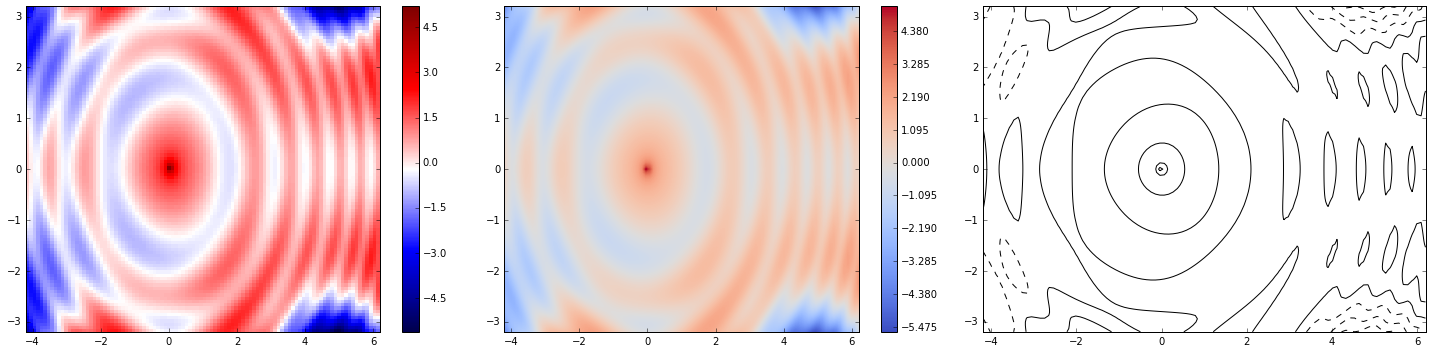

In [27]:
# Question 2
X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
fig1 = plt.figure(figsize = (20,5))

ax1 = fig1.add_subplot(131)
firstplot = ax1.pcolor(X,Y,Z, cmap = cm.seismic)
ax1.set_xlim(-4.2,6.2)
ax1.set_ylim(-3.2,3.2)
fig1.colorbar(firstplot)

ax2 = fig1.add_subplot(132)
secondplot = ax2.contourf(X,Y,Z, 1000, cmap = cm.coolwarm)
fig1.colorbar(secondplot)
ax3 = fig1.add_subplot(133)
plt.rcParams['contour.negative_linestyle'] = 'dashed'
thirdplot = ax3.contour(X,Y,Z, colors = 'k')
plt.tight_layout()
plt.show()




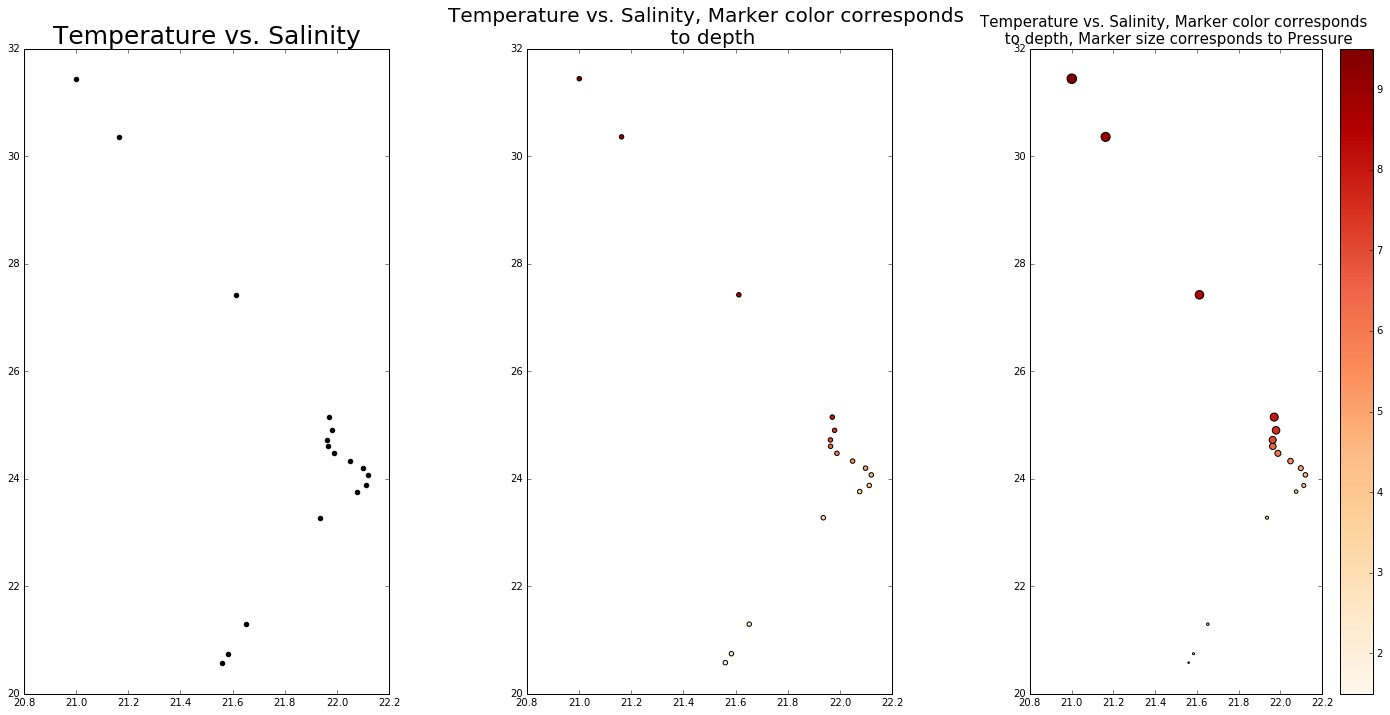

In [23]:
# Question 3
g = open('../python4geosciences/data/MCH/m1001a.cnv2')
g.seek(0)
for i in range(0,57):
    g.readline()
temp = []    
salinity = []
depth = []
pressure = []
for ln in g.readlines():
    data = ln.split()
    temp.append(float(data[2]))
    salinity.append(float(data[5]))
    pressure.append(float(data[0]))
    depth.append(float(data[1]))
fig2 = plt.figure(figsize = (20,10))
ax2 = fig2.add_subplot(131)
ax2.set_title("Temperature vs. Salinity", fontsize = 25)
ax3 = fig2.add_subplot(132)
ax3.set_title("Temperature vs. Salinity, Marker color corresponds \n to depth", fontsize = 20)
ax4 = fig2.add_subplot(133)
ax4.set_title('Temperature vs. Salinity, Marker color corresponds \n to depth, Marker size corresponds to Pressure', fontsize = 15)

ax2.scatter(temp, salinity, color = 'k')
ax3.scatter(temp, salinity, c = depth, cmap = cm.OrRd)
depthcolor = ax4.scatter(temp, salinity, c = depth , s = np.array(pressure)**2, cmap = cm.OrRd) #Squared to make more noticeable
fig2.tight_layout()
fig2.colorbar(depthcolor)

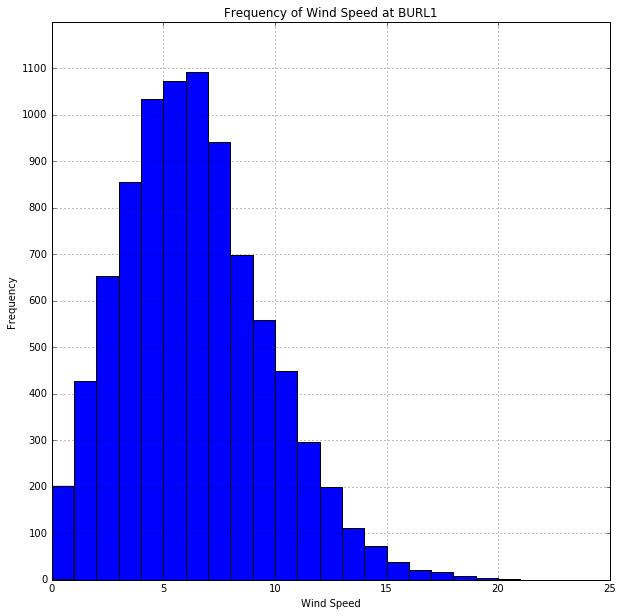

In [16]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]
fig3 = plt.figure(figsize = (10,10) )
ax5 = fig3.add_subplot(111)
ax5.hist(wind_speed, bins = 21)
ax5.set_title("Frequency of Wind Speed at BURL1")
ax5.set_yticks(np.arange(0,1200,100))
ax5.set_xlabel("Wind Speed")
ax5.set_ylabel("Frequency")
ax5.grid()